In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
####
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
####
from sklearn.metrics import mean_squared_error

####
from pandas_profiling import ProfileReport

In [111]:
data = load_boston()

In [112]:
#data.target
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [113]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [114]:
# Data Set Schema
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's


In [115]:
X, Y = load_boston(return_X_y = True)

In [116]:
X.shape

(506, 13)

In [117]:
Y.shape

(506,)

In [118]:
df = pd.DataFrame(X, columns = data.feature_names)
df['LABELS'] = Y

In [119]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LABELS
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

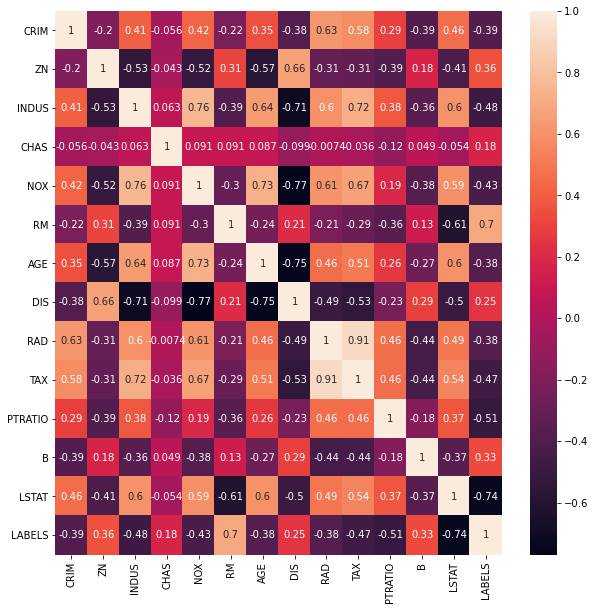

In [120]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

In [121]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [122]:
# eliminating outliers
q1 = df['LABELS'].quantile(0.25)
q3 =  df['LABELS'].quantile(0.75)
IQR = q3 - q1

outliers = df[(df['LABELS']<(q1-1.5*IQR))&(df['LABELS']>(q3+1.5*IQR))]['LABELS']
outliers

Series([], Name: LABELS, dtype: float64)

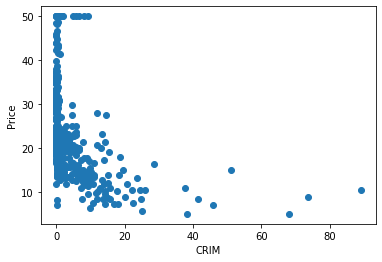

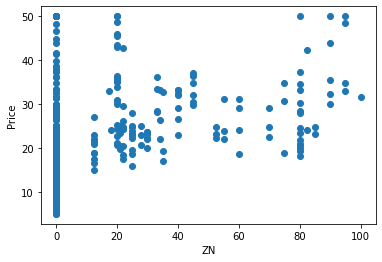

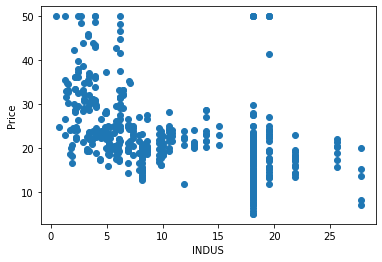

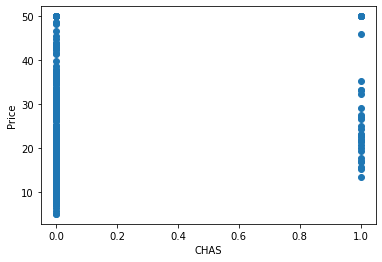

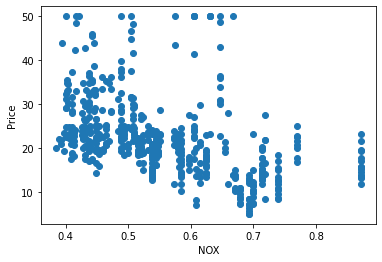

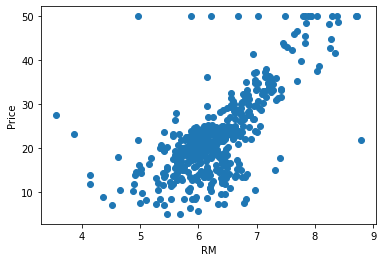

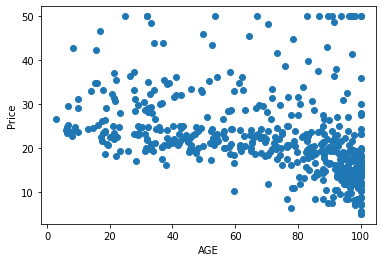

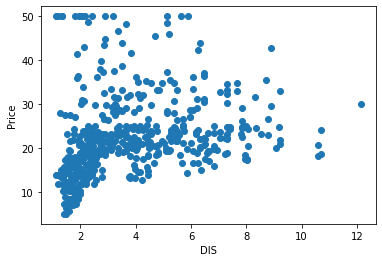

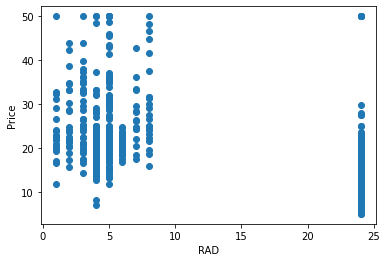

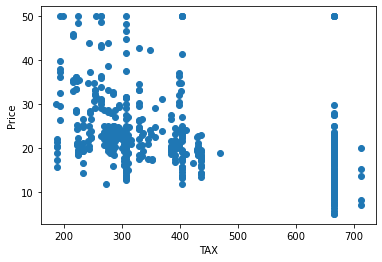

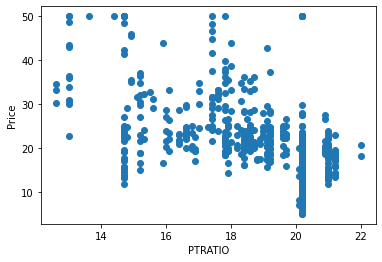

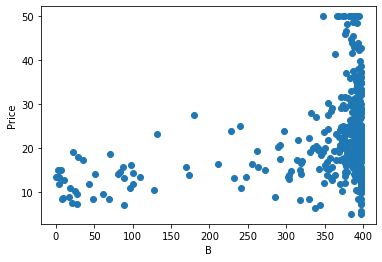

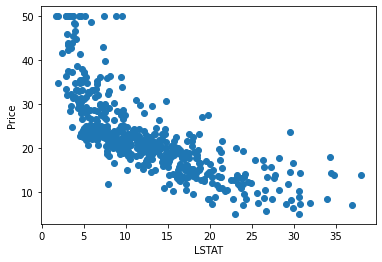

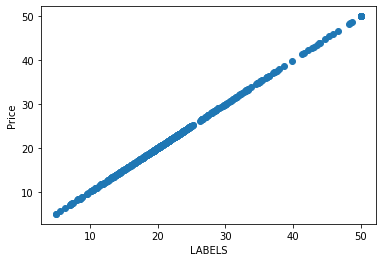

In [123]:
feature_name = df.columns
for name in feature_name:
    plt.scatter(df[name], df['LABELS'])
    plt.ylabel('Price')
    plt.xlabel(name)
    plt.show()

In [124]:
import statsmodels.formula.api as smf

feature_name = df.columns
p_val_list = []

for name in feature_name:
    model_stats = smf.ols(formula='LABELS ~ '+name , data=df).fit()
    p_val_list.append(model_stats.pvalues)
p_val_list

[Intercept    1.341723e-227
 CRIM          1.173987e-19
 dtype: float64,
 Intercept    9.489803e-195
 ZN            5.713584e-17
 dtype: float64,
 Intercept    6.704987e-173
 INDUS         4.900260e-31
 dtype: float64,
 Intercept    7.002789e-208
 CHAS          7.390623e-05
 dtype: float64,
 Intercept    9.866245e-80
 NOX          7.065042e-24
 dtype: float64,
 Intercept    6.950229e-34
 RM           2.487229e-74
 dtype: float64,
 Intercept    6.814198e-119
 AGE           1.569982e-18
 dtype: float64,
 Intercept    4.008955e-78
 DIS          1.206612e-08
 dtype: float64,
 Intercept    3.282092e-186
 RAD           5.465933e-19
 dtype: float64,
 Intercept    5.519383e-136
 TAX           5.637734e-29
 dtype: float64,
 Intercept    9.077444e-69
 PTRATIO      1.609509e-34
 dtype: float64,
 Intercept    3.491585e-11
 B            1.318113e-14
 dtype: float64,
 Intercept    3.743081e-236
 LSTAT         5.081103e-88
 dtype: float64,
 Intercept    9.326568e-15
 LABELS       0.000000e+00
 dtype:

In [125]:
feat_cols = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']]
targ_cols = df['LABELS']

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(feat_cols, targ_cols, random_state = 42, test_size = 0.2, shuffle = True)

In [127]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [128]:
linear_model = LinearRegression().fit(X_train, Y_train)

In [129]:
Y_prediction = linear_model.predict(X_test)

In [130]:
# mean squared error
mse = mean_squared_error(Y_test, Y_prediction)
mse

24.291119474973755

In [131]:
# root mean squared error
rmse = np.sqrt(mse)
rmse

4.928602182665361

In [132]:
model_score = linear_model.score(X_test, Y_test)
model_score

0.6687594935356288

In [133]:
# first 20 items, actual label vs predicted
for i in range(1,20):
    print(Y_test.values[i], '\t', round(Y_prediction[i],2))

32.4 	 36.03
13.6 	 14.82
22.8 	 25.03
16.1 	 18.77
20.0 	 23.25
17.8 	 17.66
14.0 	 14.34
19.6 	 23.01
16.8 	 20.63
21.5 	 24.91
18.9 	 18.64
7.0 	 -6.09
21.2 	 21.76
18.5 	 19.24
29.8 	 26.19
18.8 	 20.65
10.2 	 5.79
50.0 	 40.5
14.1 	 17.61


In [134]:
# Ridge Regression

In [135]:
from sklearn.linear_model import Ridge

In [136]:
small_penalty = 0.0001

In [137]:
ridge_model = Ridge(alpha = small_penalty, normalize = True).fit(X_train, Y_train)
ridge_y_pred = ridge_model.predict(X_test)

In [138]:
ridge_score = ridge_model.score(X_test, Y_test)
ridge_score

0.6687475146989291

In [139]:
# first 20 items, actual label vs predicted
for i in range(1,20):
    print(Y_test.values[i], '\t', round(ridge_y_pred[i],2))

32.4 	 36.02
13.6 	 14.82
22.8 	 25.03
16.1 	 18.77
20.0 	 23.25
17.8 	 17.66
14.0 	 14.34
19.6 	 23.01
16.8 	 20.63
21.5 	 24.91
18.9 	 18.64
7.0 	 -6.09
21.2 	 21.76
18.5 	 19.24
29.8 	 26.19
18.8 	 20.64
10.2 	 5.79
50.0 	 40.5
14.1 	 17.61


In [140]:
# lasso regression
from sklearn.linear_model import Lasso

In [141]:
lasso_model = Lasso(alpha = 0.001, normalize = True, max_iter = 100).fit(feat_cols,targ_cols)
lasso_model.coef_

array([-1.00549239e-01,  4.23750555e-02,  0.00000000e+00,  2.69026297e+00,
       -1.65258561e+01,  3.85232711e+00, -0.00000000e+00, -1.41597570e+00,
        2.63004585e-01, -1.02547310e-02, -9.33489599e-01,  9.08023522e-03,
       -5.22501984e-01])

In [142]:
for x in range(len(feat_cols.columns)):
    print(feat_cols.columns[x], '\t\t', lasso_model.coef_[x])

CRIM 		 -0.1005492394623799
ZN 		 0.04237505554501672
INDUS 		 0.0
CHAS 		 2.6902629687539483
NOX 		 -16.525856105752943
RM 		 3.8523271092975504
AGE 		 -0.0
DIS 		 -1.4159757026185227
RAD 		 0.26300458513421476
TAX 		 -0.010254731035171284
PTRATIO 		 -0.9334895990906121
B 		 0.0090802352240588
LSTAT 		 -0.522501984027725


In [143]:
feat_cols.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [144]:
feat_cols

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [145]:
targ_cols

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: LABELS, Length: 506, dtype: float64

In [146]:
# 1 nearest neighbor 
from sklearn.neighbors import KNeighborsRegressor

In [147]:
# optimization
cv_score = []
n_neighbors = np.arange(1,10)

for i in n_neighbors:
    knn_model1 = KNeighborsRegressor(n_neighbors = i).fit(X_train, Y_train)
    scores = knn_model1.score(X_test, Y_test)
    cv_score.append(scores)

<AxesSubplot:>

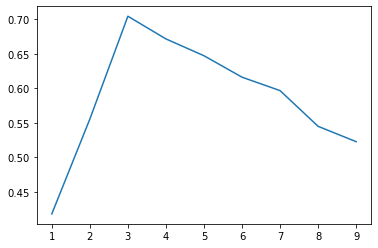

In [148]:

sns.lineplot(x = n_neighbors, y = cv_score)

In [149]:
knn_model_reg = KNeighborsRegressor(n_neighbors = 3, algorithm = 'ball_tree')
knn_model_reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=3)

In [150]:
knn_model_reg.score(X_test, Y_test)

0.7046442656646525

In [151]:
Y_pred_knn_reg = knn_model_reg.predict(X_test)

In [152]:
for i in range(1,20):
    print(Y_test.values[i], '\t', round(Y_pred_knn_reg[i],2))

32.4 	 32.77
13.6 	 14.6
22.8 	 31.0
16.1 	 17.13
20.0 	 29.3
17.8 	 17.77
14.0 	 15.97
19.6 	 19.87
16.8 	 21.43
21.5 	 23.67
18.9 	 19.87
7.0 	 11.4
21.2 	 22.67
18.5 	 23.8
29.8 	 20.97
18.8 	 19.73
10.2 	 12.63
50.0 	 36.4
14.1 	 11.1


In [153]:
lst_test_val = []
lst_pred_val = []
for i in range(1, 20):
    lst_test_val.append(Y_test.values[i])
    lst_pred_val.append(y_predict[i])
    ax = zip(list[lst_test_val, lst_pred_val])
df_val1 = pd.DataFrame(azp, columns = ['Actual', 'Predicted'])

NameError: name 'y_predict' is not defined

In [ ]:
#profile = ProfileReport(df, explorative = True, dark_mode = True, title = 'Pandas Profiling Report', html = {'style':{'full_width':True}})
#profile.to_file(output_file="output_min.html")

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
#sns.pairplot(df)

In [ ]:
sns.lineplot(x = n_neighbors, y = cv_score)